<a href="https://colab.research.google.com/github/poornass/Machine-learning-lab/blob/main/Tutorial_on_how_to_build_a_CNN_in_Keras_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step-by-step tutorial on how to build a convolutional neural network (CNN) in Keras

We will be using MNIST dataset for training the model. It has 70,000 grayscale images of hand-written digits and each such image is of 28x28 resolution. More details on the dataset are available on http://yann.lecun.com/exdb/mnist/

Let's start by importing essential libraries and modules

In [1]:
import numpy as np
from keras.models import Sequential	
from keras.layers import Dense, Dropout, Activation, Flatten     # core layers
from keras.layers import Convolution2D, MaxPooling2D             # cnn layers
from keras.utils import np_utils                                 # to transform our data

Now we'll load image data from MNIST

In [2]:
from keras.datasets import mnist
 
(X_train, y_train), (X_test, y_test) = mnist.load_data()         # Load MNIST data into train and test sets

11501568/11490434 [==============================] - 0s 0us/step


We can look at the shape of the dataset

In [3]:
print(X_train.shape)

(60000, 28, 28)


Let us plot a sample image and see how it looks (dimension of each image is 28X28 and we have 60000 images)

Now try plotting the secind image in the dataset

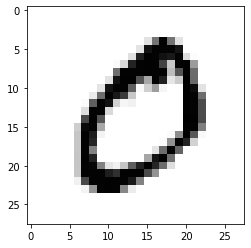

In [5]:
from matplotlib import pyplot as plt
plt.imshow(X_train[1],cmap='Greys')                                           # first image from training data

In [8]:
print(X_train.shape)

(60000, 28, 28)


Now we will preprocess/reshape input data for Keras. In other words, we will transform our dataset from having shape (n, width, height) to (n, width, height, depth).

In [9]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

Just for a confirmation, let us see the shape once more

In [10]:
print(X_train.shape)

(60000, 28, 28, 1)


Done!!! Next, we will convert our data type to float32 and normalize our data values to the range (0, 1).

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

We should have 10 different classes, one for each digit, but it looks like we only have a 1-dimensional array. Let's take a look at the labels for the first 10 training samples...

In [12]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


See... Here y_train and y_test data are not split into 10 distinct class labels, but rather are represented as a single array with the class values. So we need to convert 1-dimensional class arrays to 10-dimensional class matrices

In [13]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Now we can take another look:

In [14]:
print(Y_train.shape)

(60000, 10)


Now it's time for defining our model architecture

In [20]:
model = Sequential()	##model building
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #32 convolution filters used each of size 3x3
model.add(Convolution2D(64, 3, 3, activation='relu'))#64 convolution filters used each of size 3x3
model.add(MaxPooling2D(pool_size=(2,2)))#choose the best features via pooling
model.add(Dropout(0.25))#randomly turn neurons on and off to improve convergence
model.add(Flatten())#flatten since too many dimensions, we only want a classification output
model.add(Dense(128, activation='relu'))#fully connected to get all relevant data
model.add(Dropout(0.5))#one more dropout for convergence' sake :) 
model.add(Dense(10, activation='softmax'))

We just need to compile the model and we'll be ready to train it.

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


To fit the model on training set, the batch size and number of epochs should be declared mandatorily. The other parameters like validation_split, validation_data etc. takes some default values, which could be overidden if required.

In [22]:
model.fit(X_train, Y_train, 
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 17s 5ms/step - loss: 2.1210 - accuracy: 0.2064
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5011 - accuracy: 0.4753
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3073 - accuracy: 0.5522
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: 1.2019 - accuracy: 0.5971
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 1.1458 - accuracy: 0.6168
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.1084 - accuracy: 0.6306
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.0744 - accuracy: 0.6449
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.0450 - accuracy: 0.6568
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0214 - accuracy: 0.6666
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0

Finally, we can evaluate our model on the test data

In [23]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy: ',score[1])

Test accuracy:  0.7846999764442444
